# Notebook de prise en main du package recordlinkage

Ce notebook vise à présenter le fonctionnement du package recordlinkage et les possibilités qu'il offre. Le package recordlinkage est un outil complet proposant un ensemble de fonctions pour mener à bien chacune des étapes d'un appariement.

Les données utilisées sont des données synthétiques issues du [générateur de données synthétiques du package FEBRL](https://users.cecs.anu.edu.au/~Peter.Christen/Febrl/febrl-0.3/febrldoc-0.3/node70.html). Deux fichiers sont disponibles. Le premier fichier contient 5000 individus fictifs dont les traits d'identité (nom, prénom, date de naissance, etc.) proviennent de tables de fréquence tirés d'annuaires téléphoniques australiens. Le second fichier contient les mêmes 5000 individus, mais avec des erreurs sur les traits d'identité (substitution de caractères, suppression d'une valeur, remplacement par des variantes communes d'orthographe, etc.).

La documentation du package recordlinkage est disponible [ici](https://recordlinkage.readthedocs.io/en/latest/).

Les différents termes techniques et notions évoquées dans ce notebook sont définis dans le document de travail associé.

## Import des librairies et chargement des données

In [1]:
### Installation du package recordLinkage
!pip install recordLinkage

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.5/926.5 KB 11.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 32.8 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 6.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 KB 4.2 MB/s eta 0:00:0000:0100:01
  Created wheel for jellyfish: filename=jellyfish-0.9.0-py3-none-any.whl size=10767 sha256=a66d00ee0681f21dcc5de0e7c998233cac3129895d6177f48eafe70fbb61b566
  Stored in directory: /home/onyxia/.cache/pip/wheels/90/4d/26/fdd54e15c1ede3be6a41694e0fb122557a227b41a7a708f

In [4]:
### Import des librairies nécessaires
import numpy as np
import pandas as pd
import recordlinkage
from recordlinkage.datasets import load_febrl4

ModuleNotFoundError: No module named 'recordlinkage'

In [ ]:
### Chargement des données
dfA, dfB = load_febrl4()

In [5]:
n = len(dfA)

On va manipuler les données sous la forme de DataFrames de la librairie pandas.

On peut visualiser les 5 premières lignes des deux fichiers pour observer leur structure.

In [6]:
dfA.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-1070-org,michaela,neumann,8,stanley street,miami,winston hills,4223,nsw,19151111,5304218
rec-1016-org,courtney,painter,12,pinkerton circuit,bega flats,richlands,4560,vic,19161214,4066625
rec-4405-org,charles,green,38,salkauskas crescent,kela,dapto,4566,nsw,19480930,4365168
rec-1288-org,vanessa,parr,905,macquoid place,broadbridge manor,south grafton,2135,sa,19951119,9239102
rec-3585-org,mikayla,malloney,37,randwick road,avalind,hoppers crossing,4552,vic,19860208,7207688


In [7]:
dfB.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-561-dup-0,elton,NaN,3,light setreet,pinehill,windermere,3212,vic,19651013,1551941
rec-2642-dup-0,mitchell,maxon,47,edkins street,lochaoair,north ryde,3355,nsw,19390212,8859999
rec-608-dup-0,NaN,white,72,lambrigg street,kelgoola,broadbeach waters,3159,vic,19620216,9731855
rec-3239-dup-0,elk i,menzies,1,lyster place,NaN,northwood,2585,vic,19980624,4970481
rec-2886-dup-0,NaN,garanggar,NaN,may maxwell crescent,springettst arcade,forest hill,2342,vic,19921016,1366884


## Appariement étape par étape

### Préparation des données

En général, la première étape d'un appariement consiste en une succession de traitements pour nettoyer les données. Ici, les données synthétiques utilisées sont déjà dans un format satisfaisant (uniquement des caractères minuscules, pas d'accents, etc.). On va donc simplement ajouter une variable "année de naissance" calculée à partir de la date de naissance.

In [8]:
dfA['birthyear'] = dfA['date_of_birth'].str[:4]
dfB['birthyear'] = dfB['date_of_birth'].str[:4]

Pour utiliser les fonctions du package recordLinkage, il faut que l'identifiant soit un index (au sens du vocabulairede la librairie pandas) et non une colonne comme les autres. Cela peut être spécifié au moment du chargement des données, ou modifié par la suite via la méthode _set_index_.

In [9]:
dfA.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id,birthyear
rec_id,,,,,,,,,,,
rec-1070-org,michaela,neumann,8,stanley street,miami,winston hills,4223,nsw,19151111,5304218,1915
rec-1016-org,courtney,painter,12,pinkerton circuit,bega flats,richlands,4560,vic,19161214,4066625,1916
rec-4405-org,charles,green,38,salkauskas crescent,kela,dapto,4566,nsw,19480930,4365168,1948
rec-1288-org,vanessa,parr,905,macquoid place,broadbridge manor,south grafton,2135,sa,19951119,9239102,1995
rec-3585-org,mikayla,malloney,37,randwick road,avalind,hoppers crossing,4552,vic,19860208,7207688,1986


In [10]:
### Si 'rec_id' était une colonne et non un index, il faudrait lancer les commandes suivantes
#dfA.set_index('rec_id', inplace = True)
#dfB.set_index('rec_id', inplace = True)

### Indexation

Il s'agit maintenant de choisir les paires qui vont être comparées. Une première possibilité est de considérer l'ensemble des paires du produit cartésien des deux fichiers.

In [11]:
#### Indexation totale
indexer = recordlinkage.Index()
indexer.full()
pairs = indexer.index(dfA, dfB)

En pratique, il est souvent impossible de conserver toutes les paires en raison de la taille des fichiers. Il faut donc trouver un moyen de filtrer.

Le package recordLinkage propose différentes options. La plus classique est le blocage, sur une seule variable ou en les combinant.

#### Blocage

Le blocage consiste à conserver uniquement les paires qui correspondent sur une variable ou une sélection de variables, appelées "clés de blocage". Une bonne clé de blocage doit être assez discriminante pour réduire largement la dimension, et de très bonne qualité pour éviter de supprimer des paires d'individus identiques.

In [12]:
### Blocage simple sur le code postal
indexer = recordlinkage.Index()
indexer.block('postcode')
candidate_links = indexer.index(dfA, dfB)

print(f"Nombre de paires conservées : {len(candidate_links)}")

Nombre de paires conservées : 28609


In [13]:
### Blocage sur le code postal ET l'année de naissance
indexer = recordlinkage.Index()
indexer.block(['postcode', 'birthyear'])
pairs = indexer.index(dfA, dfB)

print(f"Nombre de paires conservées : {len(pairs)}")

Nombre de paires conservées : 4052


In [14]:
### Blocage sur le code postal OU l'année de naissance
indexer = recordlinkage.Index()
indexer.block('postcode')
indexer.block('birthyear')
pairs = indexer.index(dfA, dfB)

print(f"Nombre de paires conservées : {len(pairs)}")

Nombre de paires conservées : 265905


#### Approche du voisinage trié

In [15]:
### Approche du voisinage trié sur le prénom, avec une fenêtre de taille 9
### Chaque individu va être comparé aux 9 individus de l'autre fichier dont le prénom est le plus proche alphabétiquement.
indexer = recordlinkage.Index()
indexer.sortedneighbourhood('given_name', window = 9)
pairs = indexer.index(dfA, dfB)

Pour la suite de ce tutoriel, nous allons conserver les paires issues du blocage simple sur le code postal, ce qui correspond à l'objet que nous avons appelé `candidate_links` un peu plus haut.

On peut afficher une partie des paires retenues.

In [16]:
candidate_links

MultiIndex([('rec-1070-org', 'rec-1070-dup-0'),
            ('rec-1070-org', 'rec-1124-dup-0'),
            ('rec-1124-org', 'rec-1070-dup-0'),
            ('rec-1124-org', 'rec-1124-dup-0'),
            ('rec-1016-org', 'rec-4695-dup-0'),
            ('rec-1016-org', 'rec-1989-dup-0'),
            ('rec-1016-org', 'rec-3539-dup-0'),
            ('rec-1016-org', 'rec-1719-dup-0'),
            ('rec-1016-org', 'rec-4100-dup-0'),
            ('rec-1016-org', 'rec-4588-dup-0'),
            ...
            ('rec-1881-org', 'rec-1564-dup-0'),
            ( 'rec-878-org',  'rec-878-dup-0'),
            ('rec-3475-org', 'rec-3475-dup-0'),
            ('rec-3184-org', 'rec-3184-dup-0'),
            ('rec-1591-org', 'rec-1591-dup-0'),
            ( 'rec-704-org', 'rec-1524-dup-0'),
            ( 'rec-873-org',  'rec-873-dup-0'),
            ('rec-3905-org', 'rec-3905-dup-0'),
            ('rec-3125-org', 'rec-3125-dup-0'),
            ('rec-2792-org', 'rec-2792-dup-0')],
           names=['rec_

### Comparaison des champs

L'étape suivante consiste à comparer les paires conservées champ par champ. Le package propose différentes méthodes de comparaison en fonction du type de champ.

Par exemple, la méthode _exact_ permet d'effectuer une comparaison exacte tandis que la méthode _string_ calcule une mesure similarité entre deux chaînes de caractères. Par défaut, c'est la distance de Levenshtein qui est utilisée, mais d'autres méthodes sont disponibles, comme la similarité de Jaro-Winkler.

Ces calculs peuvent être effectués en parallèle. Le paramètre `n_jobs` permet de définir le nombre de cœurs utilisés. Il est par défaut fixé à 1 (pas de calcul parallèle), et la valeur -1 permet d'utiliser tous les cœurs disponibles.

Dans cet exemple, les champs `date_of_birth`, `suburb` et `state` sont comparés de façon exacte, avec un résultat binaire. Les champs `given_name` et `surname` sont comparés via la similarité de Jaro-Winkler. Enfin, c'est la distance de Levenshtein qui est utilisée pour le champ `address_1`, et le résultat est transformé en une variable binaire en fixant un seuil à 0.85 grâce au paramètre `threshold`.

On n'effectue aucune comparaison sur la variable `postcode` ici, puisqu'elle est la seule clé de blocage : ainsi, toutes les paires retenues présentent forcément le même code postal, cette variable ne porte plus d'information.

In [17]:
compare_cl = recordlinkage.Compare(n_jobs=-1)

# Définition des modes de comparaison pour chaque champ (aucun calcul n'est effectué à ce stade)
compare_cl.string('given_name', 'given_name', method='jarowinkler', label='given_name')
compare_cl.string('surname', 'surname', method='jarowinkler', label='surname')
compare_cl.exact('date_of_birth', 'date_of_birth', label='date_of_birth')
compare_cl.exact('suburb', 'suburb', label='suburb')
compare_cl.exact('state', 'state', label='state')
compare_cl.string('address_1', 'address_1', threshold=0.85, label='address_1')

# La méthode compute permet de lancer les calculs
features = compare_cl.compute(candidate_links, dfA, dfB)

In [18]:
features

given_name   surname  date_of_birth  suburb  \
rec_id_1     rec_id_2                                                      
rec-1070-org rec-1070-dup-0    0.950000  0.428571              1       0   
             rec-1124-dup-0    0.458333  0.436508              0       0   
rec-1124-org rec-1070-dup-0    0.458333  0.539683              0       0   
             rec-1124-dup-0    1.000000  1.000000              1       1   
rec-1016-org rec-4695-dup-0    0.648148  0.607143              0       0   
...                                 ...       ...            ...     ...   
rec-704-org  rec-1524-dup-0    0.464286  0.405303              0       0   
rec-873-org  rec-873-dup-0     0.455556  1.000000              1       1   
rec-3905-org rec-3905-dup-0    0.971429  0.975000              1       1   
rec-3125-org rec-3125-dup-0    1.000000  1.000000              1       0   
rec-2792-org rec-2792-dup-0    1.000000  0.922222              1       1   

                             state  address_1  
rec_id_1     rec_id_2                          
rec-1070-org rec-1070-dup-0      0        1.0  
             rec-1124-dup-0      1        0.0  
rec-1124-org rec-1070-dup-0      0        0.0  
             rec-1124-dup-0      1        1.0  
rec-1016-org rec-4695-dup-0      0        0.0  
...                            ...        ...  
rec-704-org  rec-1524-dup-0      0        0.0  
rec-873-org  rec-873-dup-0       1        0.0  
rec-3905-org rec-3905-dup-0      1        1.0  
rec-3125-org rec-3125-dup-0      1        1.0  
rec-2792-org rec-2792-dup-0      0        1.0  

[28609 rows x 6 columns]

Voici le résultat de la comparaison des champs sur quelques individus. Les comparaisons n'ont été effectuées  et ne sont donc disponibles que sur les paires d'individus conservées à l'issue de l'étape d'indexation (c'est-à-dire ceux ayant le même code postal dans cet exemple).

In [19]:
def print_field_comparisons(record_number):
    try:
        return pd.concat([dfA.loc[f'rec-{record_number}-org'],
                          dfB.loc[f'rec-{record_number}-dup-0'],
                          features.loc[f'rec-{record_number}-org', f'rec-{record_number}-dup-0'].round(2),
                          pd.Series({'given_name':'Jaro-Winkler', 'surname':'Jaro-Winkler', 'street_number':'Non comparé', 
                                     'address_1':'Levenshtein et seuil à 0.85', 'address_2':'Non comparé', 'suburb':'Exact', 
                                     'postcode':'Non comparé (clé de blocage)', 'state':'Exact', 'date_of_birth':'Exact','soc_sec_id':'Non comparé', 
                                     'birthyear':'Non comparé'}, name='Modes de comparaison')],
                         axis = 1)
    except:
        print("Les mesures de comparaison ne sont pas disponibles pour cet individu.")
        return None

In [20]:
print_field_comparisons(1070)

,rec-1070-org,rec-1070-dup-0,"(rec-1070-org, rec-1070-dup-0)",Modes de comparaison
given_name,michaela,michafla,0.95,Jaro-Winkler
surname,neumann,jakimow,0.43,Jaro-Winkler
street_number,8,8,NaN,Non comparé
address_1,stanley street,stanleykstreet,1.00,Levenshtein et seuil à 0.85
address_2,miami,miami,NaN,Non comparé
suburb,winston hills,winstonbhills,0.00,Exact
postcode,4223,4223,NaN,Non comparé (clé de blocage)
state,nsw,NaN,0.00,Exact
date_of_birth,19151111,19151111,1.00,Exact
soc_sec_id,5304218,5304218,NaN,Non comparé


In [21]:
print_field_comparisons(1124)

,rec-1124-org,rec-1124-dup-0,"(rec-1124-org, rec-1124-dup-0)",Modes de comparaison
given_name,lily,lily,1.0,Jaro-Winkler
surname,clarke,clarke,1.0,Jaro-Winkler
street_number,25,25,NaN,Non comparé
address_1,emerton street,emerton street,1.0,Levenshtein et seuil à 0.85
address_2,eight mile,eight yile,NaN,Non comparé
suburb,woodville south,woodville south,1.0,Exact
postcode,4223,4223,NaN,Non comparé (clé de blocage)
state,nsw,nsw,1.0,Exact
date_of_birth,19690612,19690612,1.0,Exact
soc_sec_id,4559335,4559335,NaN,Non comparé


In [22]:
print_field_comparisons(1016)

,rec-1016-org,rec-1016-dup-0,"(rec-1016-org, rec-1016-dup-0)",Modes de comparaison
given_name,courtney,courtney,1.0,Jaro-Winkler
surname,painter,painter,1.0,Jaro-Winkler
street_number,12,12,NaN,Non comparé
address_1,pinkerton circuit,pinkerton circuit,1.0,Levenshtein et seuil à 0.85
address_2,bega flats,NaN,NaN,Non comparé
suburb,richlands,richlands,1.0,Exact
postcode,4560,4560,NaN,Non comparé (clé de blocage)
state,vic,vci,0.0,Exact
date_of_birth,19161214,19161214,1.0,Exact
soc_sec_id,4066625,4066625,NaN,Non comparé


### Comparaison des paires : classification

L'étape suivante consiste à agréger les mesures de similarité calculées ci-dessus pour décider du statut de chaque paire. Là aussi, différentes méthodes existent.

#### Approche directe

La méthode la plus directe consiste à faire la somme des mesures de similarité calculées pour chaque champ et à classer les paires en fonction d'un seuil sur ce score. Ici, on voit beaucoup de paires avec des scores entre 0 et 2, qui correspondent probablement à des paires d'individus différents. A l'inverse, on a des pics autour de 5 et 6, pour des individus qui ont donc beaucoup de traits d'identité en commun. On peut donc décider de lier une paire à condition que le score agrégé soit supérieur à 3.

Text(0.5, 1.0, "Répartition des scores agrégés sur l'ensemble des paires conservées")

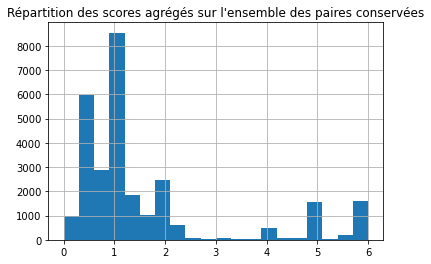

In [23]:
ax = features.sum(axis=1).hist(bins=20)
ax.set_title("Répartition des scores agrégés sur l'ensemble des paires conservées")

In [24]:
### Affichage de toutes les paires dont le score agrégé est supérieur à 3
features[features.sum(axis=1) > 3]

,,given_name,surname,date_of_birth,suburb,state,address_1
rec_id_1,rec_id_2,,,,,,
rec-1070-org,rec-1070-dup-0,0.950000,0.428571,1,0,0,1.0
rec-1124-org,rec-1124-dup-0,1.000000,1.000000,1,1,1,1.0
rec-1016-org,rec-1016-dup-0,1.000000,1.000000,1,1,0,1.0
rec-4695-org,rec-4695-dup-0,1.000000,1.000000,0,0,1,1.0
rec-4158-org,rec-4158-dup-0,1.000000,0.922222,1,0,1,1.0
...,...,...,...,...,...,...,...
rec-1591-org,rec-1591-dup-0,1.000000,1.000000,0,1,1,0.0
rec-873-org,rec-873-dup-0,0.455556,1.000000,1,1,1,0.0
rec-3905-org,rec-3905-dup-0,0.971429,0.975000,1,1,1,1.0


Le package recordLinkage propose également des fonctions pour classer les paires en utilisant l'approche probabiliste ou du _machine learning_.

#### Approche probabiliste

L'approche probabiliste classique, telle que mise en œuvre dans le package, ne prend en entrée que des mesures de similarité binaires. On utilise donc le paramètre `binarize` avec un seuil fixé ici à 0,92 pour transformer les mesures de similarité du nom et du prénom en des variables 0-1.

In [29]:
### Option pour que le format des résultats soit une Series pandas, plus facile à manipuler
recordlinkage.set_option('classification.return_type', 'series')

In [30]:
### Classification par la méthode probabiliste (algorithme EM)
ecm = recordlinkage.ECMClassifier(binarize = 0.92)
result_ecm = ecm.fit_predict(features)
result_ecm[:5]

rec_id_1      rec_id_2      
rec-1070-org  rec-1070-dup-0    1
              rec-1124-dup-0    0
rec-1124-org  rec-1070-dup-0    0
              rec-1124-dup-0    1
rec-1016-org  rec-4695-dup-0    0
Name: classification, dtype: int64

Puisque la classification par l'approche probabiliste ne repose que sur des variables binaires, il est possible et intéressant d'observer la répartition des paires en fonction des motifs de correspondance des champs identifiants (exemple de motif de correspondance : mêmes nom, prénom et code postal ; mais date de naissance, ville, état, et adresse différents).

On peut aussi étudier la probabilité associée à chaque groupe, puisque toutes les paires qui partagent le même motif de correspondance sont associées à la même probabilité. Il faut tout de même noter que ceci ne concerne que les paires conservées à l'issue de l'étape d'indexation. Pour les autres, les comparaisons de champs n'ont pas été effectuées et il n'y a pas de probabilité associée.

In [80]:
agreement_pattern = pd.concat([features, ecm.prob(features).to_frame('prob')], axis = 1)
agreement_pattern['given_name'] = np.where(agreement_pattern['given_name'] < 0.92, 0, 1)
agreement_pattern['surname'] = np.where(agreement_pattern['surname'] < 0.92, 0, 1)
agreement_pattern = (agreement_pattern
                     .groupby(['given_name', 'surname', 'date_of_birth', 'suburb', 'state', 'address_1', 'prob'])
                     .size()
                     .to_frame('count')
                     .reset_index()
                     .sort_values('count', ascending = False)
                     .reset_index(drop=True)
                    )

In [87]:
agreement_pattern.head(30)

,given_name,surname,date_of_birth,suburb,state,address_1,prob,count
0,0,0,0,0,0,0.0,0.000002,18742
1,0,0,0,0,1,0.0,0.000114,5352
2,1,1,1,1,1,1.0,1.000000,1470
3,1,1,1,0,1,1.0,1.000000,586
4,0,1,1,1,1,1.0,1.000000,313
5,1,1,1,1,1,0.0,1.000000,277
6,0,0,1,1,1,1.0,1.000000,217
7,1,1,0,1,1,1.0,1.000000,197
8,1,0,1,1,1,1.0,1.000000,193
9,0,1,0,0,0,0.0,0.001666,115


#### Approche _machine learning_

La classification par _machine learning_ impose de fournir un ensemble de paires annotées. La fonction d'entraînement du modèle prend en entrée l'ensemble des paires annotées sous la forme d'un dataframe ainsi qu'un index pandas contenant l'ensemble des paires d'individus identiques parmi les paires annotées. La fonction _create_training_pairs_ ci-dessous vise à créer un échantillon d'entraînement pour les données synthétiques utilisées dans ce notebook.

In [ ]:
def create_training_pairs(features, n_pairs):
    """
    Creates a training dataset from the FEBRL synthetic data for the recordlinkage library.
    The training dataset contains n_pairs matching pairs and n_pairs non-matching pairs. 
    Labeled pairs are chosen randomly in the set of remaining pairs after the blocking step.

            Parameters:
                    features (pd.DataFrame): Features DataFrame of the recordlinkage library
                    n_pairs (int): Number of matching and non-matching pairs to be included in the json
                    path (str): Saving path for the csv

            Returns:
                    training (pd.DataFrame): Training data for the recordlinkage library
                    true_matches(pd.MultiIndex): Index of the true matches from the training data
                    
    """
    features_copy = features.copy()
    features_copy['match'] = (features_copy.index.get_level_values(0).str.replace('org', 'dup-0') == features_copy.index.get_level_values(1)).astype(int)
    features_copy = features_copy.sample(frac=1)
    training = pd.concat([features_copy.loc[features_copy['match'] == 1].iloc[:n_pairs],
                           features_copy.loc[features_copy['match'] == 0].iloc[:n_pairs]])
    training = training.sample(frac=1)['match'].to_frame()
    training = features.join(training, how='inner')
    true_matches = training.loc[training['match'] == 1].index
    training = training.drop(columns='match')
    return(training, true_matches)

In [ ]:
### Construction d'un échantillon d'entraînement pour la classification par machine learning
training, true_matches = create_training_pairs(features, 50)

In [ ]:
training.head()

In [ ]:
true_matches[:5]

In [ ]:
### Entraînement d'un modèle de régression logistique sur l'échantillon de paires annotées
logreg = rl.LogisticRegressionClassifier()
logreg.fit(training, true_matches)

In [ ]:
### Prédiction du modèle sur l'ensemble des données
result_logreg = logreg.predict(features)
result_logreg.head()

### Résolution des conflits

Les méthodes usuelles de classification des paires traitent les paires de façon indépendante. Cependant, lorsqu'on apparie des données individuelles et que les fichiers à apparier ne contiennent pas de doublons, on a besoin d'imposer une contrainte supplémentaire : un individu du premier fichier doit être apparié avec au plus un individu du second fichier, et inversement. Le code ci-dessous permet de résoudre les éventuels conflits en conservant à chaque fois la paire associée au score le plus élevé.

In [ ]:
result_ecm

In [ ]:
### Mise en forme des résultats
result_ecm = pd.concat([result_ecm, ecm.prob(features)], axis = 1)
result_ecm.rename({0: 'prob'}, axis = 1, inplace = True)

### Résolution des conflits : respect de la contrainte d'appariement 1-1
result_ecm.sort_values('prob', ascending = False, inplace = True)
result_ecm = result_ecm[~result_ecm.index.get_level_values(0).duplicated(keep='first')]
result_ecm = result_ecm[~result_ecm.index.get_level_values(1).duplicated(keep='first')]

In [74]:
result_ecm

,,classification,prob
rec_id_1,rec_id_2,,
rec-4892-org,rec-4892-dup-0,1,1.000000
rec-4449-org,rec-4449-dup-0,1,1.000000
rec-935-org,rec-935-dup-0,1,1.000000
rec-1771-org,rec-1771-dup-0,1,1.000000
rec-290-org,rec-290-dup-0,1,1.000000
...,...,...,...
rec-218-org,rec-4094-dup-0,0,0.000002
rec-251-org,rec-3275-dup-0,0,0.000002
rec-3396-org,rec-3864-dup-0,0,0.000002


### Évaluation de la qualité

Évaluer la qualité d'un appariement est une étape primordiale mais souvent difficile à réaliser car on ne connaît pas le vrai statut de chaque paire. Il faut donc utiliser un échantillon représentatif annoté.

Ici, la tâche est plus simple puisque nous travaillons avec des données générées. On peut donc calculer les résultats sur l'ensemble des individus.

Le package recordlinkage propose des fonctions pour calculer les mesures de performance classiques (vrais/faux positifs et négatifs, précision, rappel, F-score) mais il est tout aussi simple de procéder aux manipulations soi-même avec des opérations sur les DataFames pandas. Les fonctions proposées ci-dessous permettent de calculer et d'afficher les mesures de performance pour les données utilisées dans ce notebook.

In [35]:
def compute_performance_metrics_FEBRL(linkage_output, dataset_size):
    """
    Compute performance metrics of a record linkage process on FEBRL synthetic data.
    The assumption is that the size of the two datasets is the same and every record 
    from dataset A has exactly one match in dataset B.

            Parameters:
                    linkage output (pandas Series): Output from the linkage process
                    dataset_size (int): Length of both datasets to be linked

            Returns:
                    performance_metrics (tuple): Tuple of metrics (TP, TN, FP, FN, precision, recall, F-measure)
    """
    linkage_output = linkage_output.reset_index()
    linkage_output['actual'] = (linkage_output['rec_id_1'].str.extract(r'(rec-\d+)') 
                                == linkage_output['rec_id_2'].str.extract(r'(rec-\d+)'))
    
    TP = sum(linkage_output['classification'] & linkage_output['actual'])
    FP = sum(linkage_output['classification'] & ~linkage_output['actual'])
    #Pairs that were removed in the indexing phase must be taken into account to compute True and False negatives
    FN = dataset_size - TP
    TN = dataset_size*dataset_size - TP - FN - FP
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    Fscore = 2 * precision * recall / (precision + recall)
    performance_metrics = (TP, TN, FP, FN, precision, recall, Fscore)
    return(performance_metrics)
    
def print_performance_metrics(linkage_output, dataset_size):
    """
    Prints performance metrics of a record linkage process on synthetic data.
    The assumption is that the size of the two datasets is the same and every record 
    from dataset A has exactly one match in dataset B.

            Parameters:
                    linkage output (pandas Series): Output from the linkage process
                    dataset_size (int): Length of both datasets to be linked

            Returns:
                    None
    """
    TP, TN, FP, FN, precision, recall, Fscore = compute_performance_metrics_FEBRL(linkage_output, dataset_size)
    print(f"Vrais positifs : {TP:,}".replace(',', ' '))
    print(f"Vrais négatifs : {TN:,}".replace(',', ' '))
    print(f"Faux positifs : {FP:,}".replace(',', ' '))
    print(f"Faux négatifs : {FN:,}".replace(',', ' '))
    print(f"Précision : {precision:.4}")
    print(f"Rappel : {recall:.4}")
    print(f"F-mesure : {Fscore:.4}")

In [36]:
print_performance_metrics(result_ecm, n)

Vrais positifs : 4 210
Vrais négatifs : 24 994 998
Faux positifs : 2
Faux négatifs : 790
Précision : 0.9995
Rappel : 0.842
F-mesure : 0.914


On peut effectuer deux constats sur les résultats. 
- D'abord, il n'y a aucun faux positif ou presque, probablement dû au fait que les erreurs générées sur le fichier B sont assez légères et ne perturbent donc pas trop l'algorithme d'appariement.
- Du côté des faux négatifs, c'est moins satisfaisant : on rate beaucoup de paires d'individus identiques. La raison de ce défaut est sans doute le blocage un peu trop strict qui a été choisi, puisqu'on n'utilise que le code postal comme clé de blocage. Ainsi, tous les individus qui présentent une erreur sur le code postal dans le fichier B n'ont aucune chance d'être bien appariés, quelle que soit la qualité des données sur les autres champs identifiants. On pourrait donc améliorer l'appariement en utilisant plusieurs clés de bocage, afin de ne pas mettre trop de poids sur une seule variable.

Quoi qu'il en soit, ces résultats sont propres aux deux fichiers appariés. Un autre jeu de fichiers, avec des données de qualité différente et des types d'erreurs différents, donnerait un tout autre résultat.

## Exemple de code complet pour un appariement

In [ ]:
### Import des librairies nécessaires
import pandas as pd
import recordlinkage
from recordlinkage.datasets import load_febrl4

### Chargement des données
dfA, dfB = load_febrl4()

### Blocage simple sur le code postal
indexer = recordlinkage.Index()
indexer.block('postcode')
candidate_links = indexer.index(dfA, dfB)

### Comparaison des champs
compare_cl = recordlinkage.Compare(n_jobs=-1)

compare_cl.string('given_name', 'given_name', method='jarowinkler', label='given_name')
compare_cl.string('surname', 'surname', method='jarowinkler', label='surname')
compare_cl.exact('date_of_birth', 'date_of_birth', label='date_of_birth')
compare_cl.exact('suburb', 'suburb', label='suburb')
compare_cl.exact('state', 'state', label='state')
compare_cl.string('address_1', 'address_1', threshold=0.85, label='address_1')

features = compare_cl.compute(candidate_links, dfA, dfB)

### Comparaison des paires : classification par la méthode probabiliste (algorithme EM)
ecm = recordlinkage.ECMClassifier(binarize=0.92)
result_ecm = ecm.fit_predict(features)

### Résolution des conflits
result_ecm = pd.concat([result_ecm, ecm.prob(features)], axis = 1)
result_ecm.rename({0: 'prob'}, axis = 1, inplace = True)
result_ecm.sort_values('prob', ascending = False, inplace = True)
result_ecm = result_ecm[~result_ecm.index.get_level_values(0).duplicated(keep='first')]
result_ecm = result_ecm[~result_ecm.index.get_level_values(1).duplicated(keep='first')]